## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [5]:
#medium link: https://jennifer-jyh-jj.medium.com/heart-attack-analysis-6399ffab8ac7

#importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

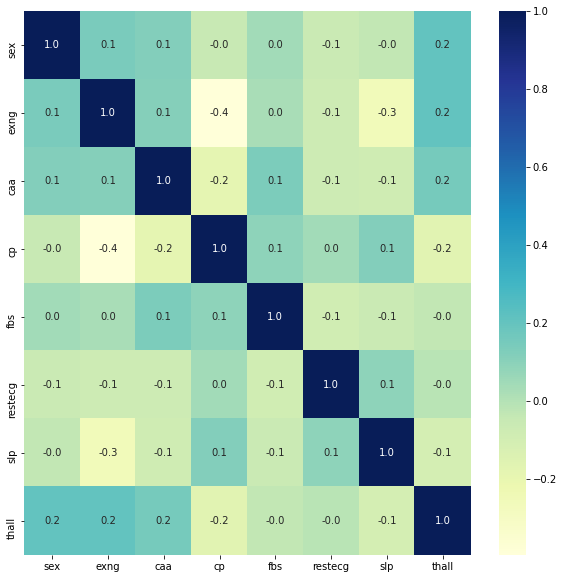

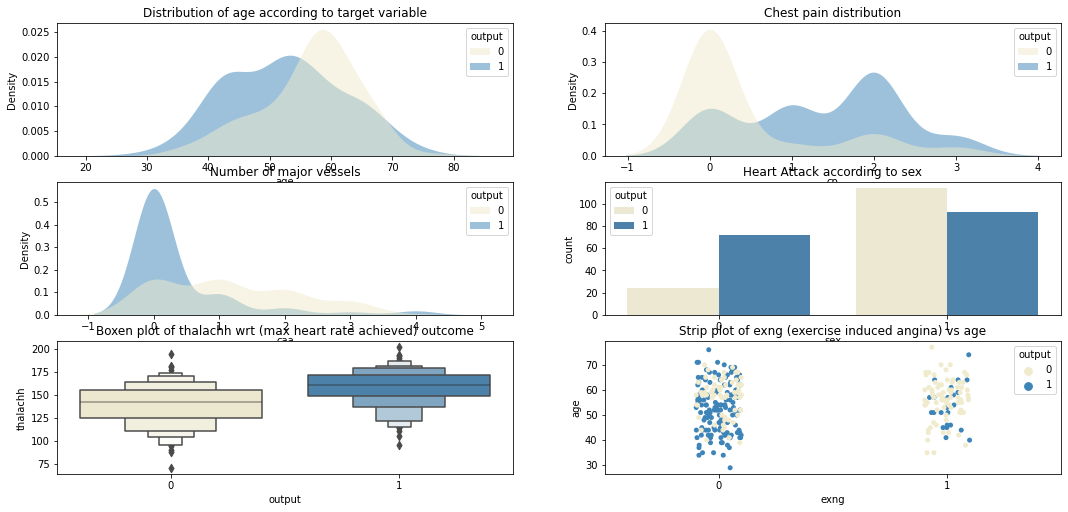

In [19]:
# Start solution here
# Have a large enough dataset
heartds = pd.read_csv("heart.csv")
heartds.head()
heartds.isnull().sum()

# separating the columns in categorical and continuous
categorical = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous = ["age","trtbps","chol","thalachh","oldpeak"]
target = ["output"]

# Plot interesting graphs and results
# Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
# correlation matrix
df_corr = heartds[continuous].corr().transpose()
df_corr1 = heartds[categorical].corr().transpose()
df_corr = heartds[continuous].corr().transpose()
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_corr1,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()
## According to the heatmap, there doesn't seem to be a linear correlation between continuous variables. 

# Distributions of different features
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(7,2)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax0.set_title("Distribution of age according to target variable")
sns.kdeplot(ax=ax0, data=heartds, x='age',hue="output", fill=True,palette=["#f0ebcc","#3d84b8"], alpha=.5, linewidth=0)
ax1.set_title("Chest pain distribution")
sns.kdeplot(ax=ax1, data=heartds, x='cp',hue="output", fill=True,palette=["#f0ebcc","#3d84b8"], alpha=.5, linewidth=0)
ax2.set_title("Number of major vessels")
sns.kdeplot(ax=ax2, data=heartds, x='caa',hue="output", fill=True,palette=["#f0ebcc","#3d84b8"], alpha=.5, linewidth=0)
ax3.set_title("Heart Attack according to sex")
sns.countplot(ax=ax3,data=heartds,x='sex',palette=["#f0ebcc","#3d84b8"], hue='output')
ax4.set_title("Boxen plot of thalachh wrt (max heart rate achieved) outcome")
sns.boxenplot(ax=ax4, data=heartds,x='output',y='thalachh',palette=["#f0ebcc","#3d84b8"])
ax5.set_title("Strip plot of exng (exercise induced angina) vs age")
sns.stripplot(ax=ax5, data=heartds,x='exng',y='age',hue='output',palette=["#f0ebcc","#3d84b8"])
##We might think that older people might have higher chances of heart attack but it doesn't appear so. People with higher maximum heart rate achieved have higher chances of heart attack. People with non-anginal chest pain (cp=2)m have higher chnaces of heart attack. People with 0 major vessels have high chances of heart attack. People with sex=1 have high chances of heart attack. People with no exercise induced angina have higher chance of heart attack



The test accuracy score of SVM is  0.8688524590163934
The test accuracy score of Logistric Regression is  0.9016393442622951


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


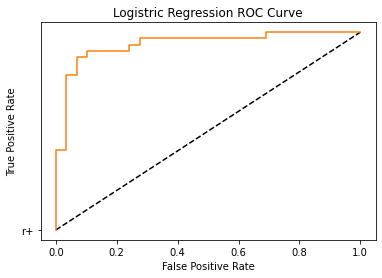

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The test accuracy score of Decision Tree is  0.7868852459016393
The test accuracy score of Random Forest is  0.7868852459016393
    features  importance
4    oldpeak    0.133453
20   thall_2    0.115776
3   thalachh    0.096224
Train RMSE: 0.322214
Test RMSE: 0.339375
L1 coefficient: [0.5 0. ]
L1 intercept: 0.20000000000000004
L2 coefficient: [0.34545455 0.34545455]
L2 intercept: 0.13636363636363638
[07:49:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.352764


In [22]:
# Split your data in training and testing
df = heartds
categories = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous = ["age","trtbps","chol","thalachh","oldpeak"]
df = pd.get_dummies(df, columns = categories, drop_first = True)
X = df.drop(['output'],axis=1)
y = df[['output']]
scaler = RobustScaler()
X[continuous] = scaler.fit_transform(X[continuous])
X.head()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Try different models on your training dataset - then select the most promising model

# Linear Classifiers
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

#Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_proba = logreg.predict_proba(X_test)
y_pred = np.argmax(y_pred_proba,axis=1)
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

#ROC Curve for Logistic Regression
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

#Decision Tree
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

#Random Forest
rf = RandomForestClassifier(n_estimators=100, max_features=7, random_state=42)
rf.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))
# feature importance
feature_importances = rf.feature_importances_
features = X_train.columns
frame = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(3, 'importance')
print(frame)

#Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)

pred_train = linear_reg_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train,pred_train))
print("Train RMSE: %f" % (train_rmse))

pred_test = linear_reg_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test,pred_test))
print("Test RMSE: %f" % (test_rmse))

# Use cross validation to fine tune the model’s parameters such as alpha in lasso
#L1 regularization
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])
print("L1 coefficient:", reg.coef_)
print("L1 intercept:", reg.intercept_)

#L2 regularization
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, 0.1, 1])
print("L2 coefficient:", reg.coef_)
print("L2 intercept:", reg.intercept_)

# Simplify your model using regularization, prunning, drop-out, etc. to avoid overfitting
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
